# 6.2 Regresión Lineal Múltiple España

## Lucía castañeda
## A01706644

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Evaluación1_España.csv')
df.head(5)

<ipython-input-3-ac8903a36a0e>:1: DtypeWarning: Columns (0,1,3,10,36,45,46,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Evaluación1_España.csv')


,0,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,14551,https://www.airbnb.com/rooms/14551,2.02E+13,31/03/23,city scrape,Cozy & Colorful by Nature (Private Room),Up in the hill of MontjuÃ¯c (a mountain overlo...,MontjuÃ¯c is most likely the best neighborhood...,https://a0.muscache.com/pictures/16209908/f1fe...,...,4.91,4.63,4.74,HUTG-049542,f,1,0,1,0,0.37
1,1,1205757,https://www.airbnb.com/rooms/1205757,2.02E+13,31/03/23,city scrape,HabitaciÃ³n doble + baÃ±o y terraza,<b>The space</b><br />HabitaciÃ³n confortable ...,Bonitas playas a 15 minutos en coche. Piscina ...,https://a0.muscache.com/pictures/02e0a61e-078e...,...,4.91,4.69,4.80,0,f,1,0,1,0,0.51
2,2,1212820,https://www.airbnb.com/rooms/1212820,2.02E+13,01/04/23,city scrape,Apartment port de rei stunning wiew,<b>The space</b><br />Apartments first line un...,0,https://a0.muscache.com/pictures/18245529/0886...,...,4.76,4.74,4.32,0,f,2,2,0,0,0.62
3,3,751638,https://www.airbnb.com/rooms/751638,2.02E+13,31/03/23,city scrape,Room Limon - Casa Pati de lÂ´Albera,<b>The space</b><br />Nice room with 2 individ...,"Sant Climent is a tiny village, with a populat...",https://a0.muscache.com/pictures/64276178/98d1...,...,5.00,4.63,4.50,PG000794,t,6,1,5,0,0.08
4,4,41342,https://www.airbnb.com/rooms/41342,2.02E+13,01/04/23,previous scrape,Beachfront Tamariua (Costa Brava),A little paradise by the sea. Apartment 2/4 ad...,Apartment located outside the town on a small ...,https://a0.muscache.com/pictures/70414801/59d4...,...,4.73,4.91,4.36,HUTG-003688,f,1,1,0,0,0.09


In [4]:
# Seleccionar los tipos de habitaciones de interés
room_types = ["Entire home/apt", "Private room"]
data = df[df["room_type"].isin(room_types)]

host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

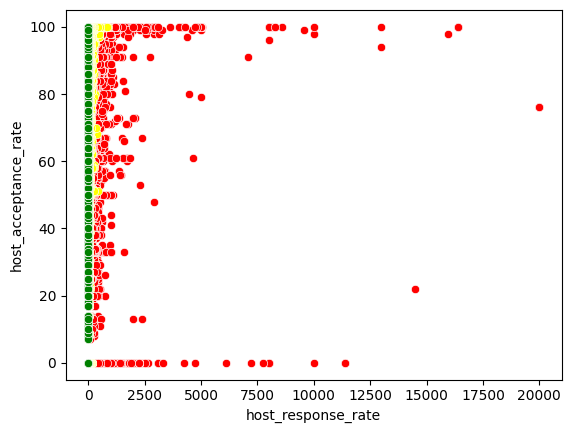

In [5]:
from turtle import color


sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="blue", data=data)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=data)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="yellow", data=data)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="green", data=data)

In [6]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['host_response_rate', 'price','number_of_reviews', 'review_scores_rating']]
Var_Dep= df['host_acceptance_rate']

In [7]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [8]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [9]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [10]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 4.69967546e-01, -9.26721078e-04,  4.05169909e-02, -1.44786440e+00]),
 'rank_': 4,
 'singular_': array([8.80207650e+04, 4.98320738e+03, 4.45293661e+03, 7.21412737e+01]),
 'intercept_': 50.83582210557813}

**Modelo matemático: y= 4.69967546e-01x1 +-9.26721078e-04x2 + 4.05169909e-02x3 + -1.44786440e+00x4 + 50.83582210557813**

In [11]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.29040895973957936

“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“

<Axes: xlabel='availability_365', ylabel='price'>

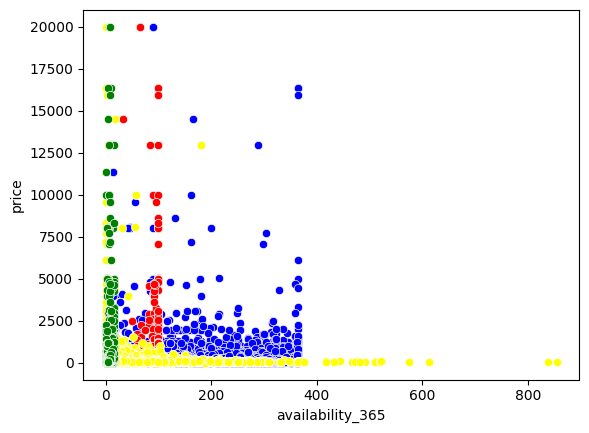

In [12]:
from turtle import color


sns.scatterplot(x='availability_365', y='price', color="blue", data=data)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=data)
sns.scatterplot(x='number_of_reviews', y='price', color="yellow", data=data)
sns.scatterplot(x='accommodates', y='price', color="green", data=data)

In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['availability_365', 'host_response_rate','number_of_reviews', 'accommodates']]
Var_Dep= df['price']

In [14]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [15]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [17]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-0.26987068, -0.95241441, -0.44368661, 43.93965673]),
 'rank_': 4,
 'singular_': array([15770.28929219,  4981.50183929,  4453.21564759,   372.23804714]),
 'intercept_': 119.57667906731453}

**Modelo matemático: y= -0.26987068x1 +  -0.95241441x2 + -0.44368661x3 + 43.93965673x4 + 119.57667906731453**

In [18]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.04115307925456679

host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication 

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

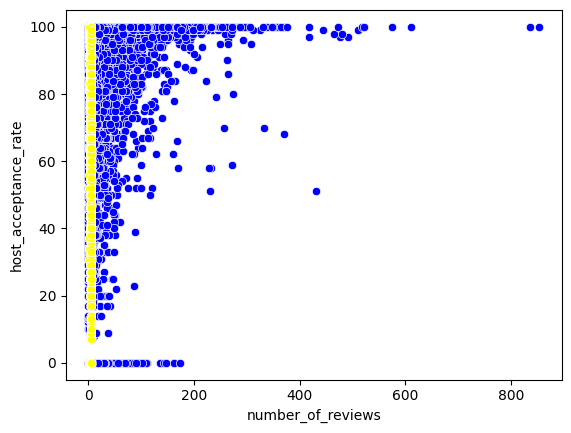

In [19]:
from turtle import color


sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=data)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=data)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="yellow", data=data)

In [20]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= df[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= df['host_acceptance_rate']

In [21]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [22]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [23]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.08595405, -0.96291823, -2.22252921]),
 'rank_': 3,
 'singular_': array([4880.96035661,   81.85238857,   43.44595743]),
 'intercept_': 97.79822634240833}

**Modelo matemático: y= 0.08595405x1 + -0.96291823x2 + -2.22252921x3 + 97.79822634240833**

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0113681208579407

In [26]:
# Seleccionar los tipos de habitaciones y las variables de interés
room_types = ["Entire home/apt", "Private room"]
variables = ["host_acceptance_rate", "host_response_rate", "review_scores_rating", 
             "price", "availability_365", "number_of_reviews", "review_scores_cleanliness",
             "review_scores_communication"]

# Crear una tabla para almacenar los coeficientes de determinación y correlación
results = pd.DataFrame(columns=["room_type", "variable", "r2", "corr"])

# Calcular los coeficientes de determinación y correlación para todas las combinaciones posibles
for room_type in room_types:
    for variable in variables:
        # Seleccionar los datos correspondientes al tipo de habitación y la variable de interés
        data_subset = data[data["room_type"] == room_type][[variable, "number_of_reviews"]].dropna()
        
        # Crear el modelo de regresión lineal y calcular los coeficientes de determinación y correlación
        if len(data_subset) > 0:
            X = data_subset[variable].values.reshape(-1, 1)
            y = data_subset["number_of_reviews"].values.reshape(-1, 1)
            model = LinearRegression().fit(X, y)
            r2 = model.score(X, y)
            corr = data_subset.corr().iloc[0,1]
            
            # Agregar los resultados a la tabla
            results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)

# Imprimir la tabla de resultados
print(results)

<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio

          room_type                     variable        r2      corr
0   Entire home/apt         host_acceptance_rate  0.008921  0.094449
1   Entire home/apt           host_response_rate  0.007960  0.089218
2   Entire home/apt         review_scores_rating  0.016017  0.126560
3   Entire home/apt                        price  0.003226 -0.056794
4   Entire home/apt             availability_365  0.003583  0.059860
5   Entire home/apt            number_of_reviews  1.000000  1.000000
6   Entire home/apt    review_scores_cleanliness  0.022249  0.149160
7   Entire home/apt  review_scores_communication  0.017222  0.131231
8      Private room         host_acceptance_rate  0.023164  0.152198
9      Private room           host_response_rate  0.037528  0.193721
10     Private room         review_scores_rating  0.013560  0.116447
11     Private room                        price  0.007580 -0.087062
12     Private room             availability_365  0.000003  0.001864
13     Private room            num

<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({"room_type": room_type, "variable": variable, "r2": r2, "corr": corr}, ignore_index=True)
<ipython-input-26-dddc6c90e5e4>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future versio